### Correlation between news and stock Price

##### Import the necessary libraries

In [1]:

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
sys.path.insert(0, os.path.dirname(os.getcwd()))

from scripts.correlations import CorrelationAnalyzer

##### Load and merge the dataset

In [3]:
folder_path='../data/yfinance_data/'
corr_analyser = CorrelationAnalyzer(folder_path=folder_path)

In [4]:
stock_data=corr_analyser.merge_csv_files(folder_path)
news_data=pd.read_csv('../data/Sentiment.csv')

In [5]:
news_data

,date,headline,url,publisher,stock,cleaned_headline,polarity,sentiment
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,stocks hit week highs friday,0.00,Neutral
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,stocks hit week highs wednesday,0.00,Neutral
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,biggest movers friday,0.00,Neutral
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,stocks moving fridays midday session,0.00,Neutral
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...
1407323,2011-08-29 00:00:00-04:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,top narrow based indexes august,0.15,positive
1407324,2011-06-22 00:00:00-04:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,recap wednesdays top percentage gainers losers,0.15,positive
1407325,2011-06-21 00:00:00-04:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,2011-06-21 00:00:00-04:00,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX,oppenheimer initiates china zenix outperform pt,0.00,Neutral


In [6]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA


##### Data preparation

In [7]:
# Convert the 'date' column to datetime format and UTC-4 timezone
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='ISO8601', utc=True)
news_data['date']=pd.to_datetime(news_data['date'], format='ISO8601', utc=True)

In [8]:
print("Minimum date from news dataset:  ",news_data.date.min())
print("Maximum date from news dataset:  ",news_data.date.max())
print("Minimum date from Stock dataset:  ",stock_data.Date.min())
print("Max date from Stock dataset:  ",stock_data.Date.max())

Minimum date from news dataset:   2009-02-14 04:00:00+00:00
Maximum date from news dataset:   2020-06-11 21:12:35+00:00
Minimum date from Stock dataset:   1980-12-12 00:00:00+00:00
Max date from Stock dataset:   2024-07-30 00:00:00+00:00


In [9]:
news_data.columns

Index(['date', 'headline', 'url', 'publisher', 'stock', 'cleaned_headline',
       'polarity', 'sentiment'],
      dtype='object')

In [10]:
for column in ['headline', 'url', 'publisher']:
    news_data.drop(column, axis=1, inplace=True)

In [11]:
news_data

,date,stock,cleaned_headline,polarity,sentiment
0,2020-06-05 14:30:54+00:00,A,stocks hit week highs friday,0.00,Neutral
1,2020-06-03 14:45:20+00:00,A,stocks hit week highs wednesday,0.00,Neutral
2,2020-05-26 08:30:07+00:00,A,biggest movers friday,0.00,Neutral
3,2020-05-22 16:45:06+00:00,A,stocks moving fridays midday session,0.00,Neutral
4,2020-05-22 15:38:59+00:00,A,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...
1407323,2011-08-29 04:00:00+00:00,ZX,top narrow based indexes august,0.15,positive
1407324,2011-06-22 04:00:00+00:00,ZX,recap wednesdays top percentage gainers losers,0.15,positive
1407325,2011-06-21 04:00:00+00:00,ZX,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,2011-06-21 04:00:00+00:00,ZX,oppenheimer initiates china zenix outperform pt,0.00,Neutral


In [12]:
# Check the missing values in each columns
news_data.isnull().sum()

date                0
stock               0
cleaned_headline    9
polarity            0
sentiment           0
dtype: int64

In [13]:
# drop any row that have a missing values
news_data.dropna(axis=0, inplace=True)

In [14]:
news_data.shape

(1407319, 5)

In [15]:
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
stock_symbol    0
dtype: int64

In [16]:
# Rename 'date' into 'Date' from news_data to make consistent
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [17]:
# Extract dates from news and stock price datasets
news_dates = news_data['Date']
stock_dates = stock_data['Date']

In [18]:
# Normalize timestamps
news_dates = pd.to_datetime(news_dates).dt.date
stock_dates = pd.to_datetime(stock_dates).dt.date

In [19]:
# Find overlaping date range
start_date=max(news_dates.min(), stock_dates.min())
end_date=min(news_dates.max(), stock_dates.max())
news_data['Date']=pd.to_datetime(news_data['Date']).dt.date
stock_data['Date']=pd.to_datetime(stock_data['Date']).dt.date

In [20]:
# Filter the data based on the specified date range
news_data=news_data[(news_data['Date']>=start_date) &  (news_data['Date']<=end_date)]
stock_data=stock_data[(stock_data['Date']>=start_date) & (stock_data['Date']<=end_date)]

In [21]:
# merge stock price and news dataset basedon the sepecified date
merged_data=pd.merge(news_data,stock_data, on='Date')

In [22]:
# display ancd check merged dataset
merged_data

,Date,stock,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
0,2020-06-05,A,stocks hit week highs friday,0.0,Neutral,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,AAPL
1,2020-06-05,A,stocks hit week highs friday,0.0,Neutral,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,AMZN
2,2020-06-05,A,stocks hit week highs friday,0.0,Neutral,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,GOOG
3,2020-06-05,A,stocks hit week highs friday,0.0,Neutral,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,META
4,2020-06-05,A,stocks hit week highs friday,0.0,Neutral,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,MSFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9287882,2011-05-12,ZX,china zenix auto international opens trading i...,0.0,Neutral,10.211000,10.309500,10.031000,10.303500,10.303500,96000000,0.0,0.0,AMZN
9287883,2011-05-12,ZX,china zenix auto international opens trading i...,0.0,Neutral,13.331032,13.373373,13.223186,13.326300,13.311152,58149143,0.0,0.0,GOOG
9287884,2011-05-12,ZX,china zenix auto international opens trading i...,0.0,Neutral,25.350000,25.389999,25.100000,25.320000,19.613352,77400000,0.0,0.0,MSFT
9287885,2011-05-12,ZX,china zenix auto international opens trading i...,0.0,Neutral,0.495000,0.513000,0.493750,0.512500,0.470079,1224000000,0.0,0.0,NVDA


In [23]:
# Keep only the rows where 'stock' is equal to 'stock_symbol'
filtered_data=merged_data[merged_data['stock']==merged_data['stock_symbol']]
filtered_data

,Date,stock,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_symbol
42435,2020-06-10,AAPL,tech stocks faangs strong start day market awa...,0.433333,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
42442,2020-06-10,AAPL,biggest price target changes wednesday,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
42449,2020-06-10,AAPL,benzinga pros top stocks watch wed jun aapl ba...,0.500000,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
42456,2020-06-10,AAPL,deutsche bank maintains buy apple raises price...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
42463,2020-06-10,AAPL,apple let users trade mac computers credit us ...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294845,2019-07-02,TSLA,electrekco tweet teslas head europe,0.000000,Neutral,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0,TSLA
8294852,2019-07-01,TSLA,teslas q delivery number could cause big move,0.000000,Neutral,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,TSLA
8294859,2019-07-01,TSLA,tesla electric airplane elon musk sees electri...,0.000000,Neutral,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,TSLA
8294866,2019-07-01,TSLA,update jmp reiterates outperform target tesla ...,0.066667,positive,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,TSLA


In [24]:
# Drop column 'stock_symbol' from the dataframe filterd
filtered_data=filtered_data.drop(columns=['stock_symbol'])

In [25]:
#  Rename column 'stock' with 'Ticker_symbole' and display the data
filtered_data.rename(columns={'stock':'Ticker_symbol'}, inplace=True)
filtered_data

,Date,Ticker_symbol,cleaned_headline,polarity,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
42435,2020-06-10,AAPL,tech stocks faangs strong start day market awa...,0.433333,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
42442,2020-06-10,AAPL,biggest price target changes wednesday,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
42449,2020-06-10,AAPL,benzinga pros top stocks watch wed jun aapl ba...,0.500000,positive,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
42456,2020-06-10,AAPL,deutsche bank maintains buy apple raises price...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
42463,2020-06-10,AAPL,apple let users trade mac computers credit us ...,0.000000,Neutral,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294845,2019-07-02,TSLA,electrekco tweet teslas head europe,0.000000,Neutral,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0
8294852,2019-07-01,TSLA,teslas q delivery number could cause big move,0.000000,Neutral,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
8294859,2019-07-01,TSLA,tesla electric airplane elon musk sees electri...,0.000000,Neutral,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
8294866,2019-07-01,TSLA,update jmp reiterates outperform target tesla ...,0.066667,positive,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0


##### Correlation Analysis

In [26]:
# Calculate daily returns using calculate_daily_returns function
filtered_data['daily_return']=corr_analyser.calculate_daily_returns(filtered_data['Close'])

In [27]:
# Remove specified columns from a pandas DataFrame
col_drop=['Stock Splits','Dividends']
filtered_data.drop(col_drop,axis=1,inplace=True)

In [28]:
# Aggregate data by date and Ticker_symbol with polarity by mean, while keeping all columns first value
aggregated_data = filtered_data.groupby(['Date', 'Ticker_symbol'], as_index=False).agg({
    'polarity': 'mean',           # Calculate mean polarity per day and Ticker symbol
    'Open': 'first',              
    'High': 'first',               
    'Low': 'first',                 
    'Close': 'first',             
    'Adj Close': 'first',          
    'Volume': 'first',               
    'daily_return':'first'          
})


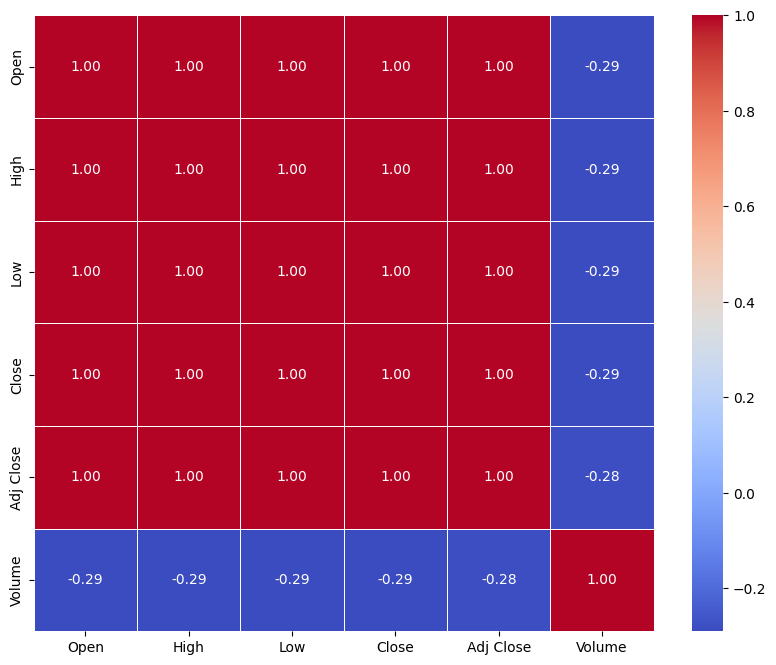

In [29]:
# Compute the correlation matrix
corr_analyser.correlation_matrix(aggregated_data)

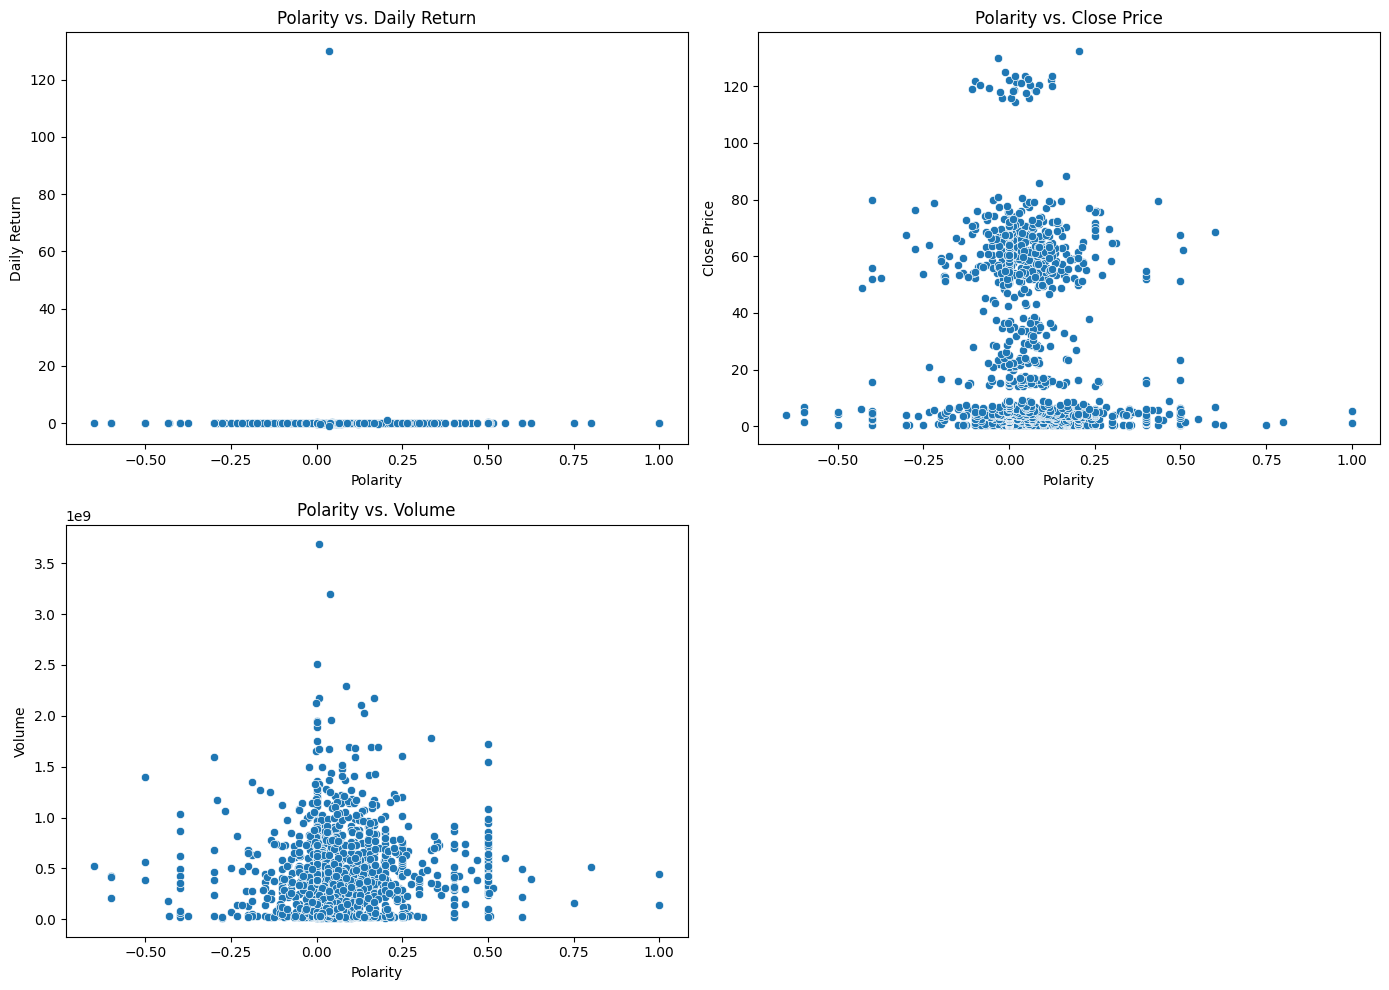

In [30]:
# Scatter plots to visualize relationships
plt.figure(figsize=(14, 10))

# Scatter plot for Polarity vs. Daily Return
plt.subplot(2, 2, 1)
sns.scatterplot(x='polarity', y='daily_return', data=aggregated_data)
plt.title('Polarity vs. Daily Return')
plt.xlabel('Polarity')
plt.ylabel('Daily Return')

# Scatter plot for Polarity vs. Close Price
plt.subplot(2, 2, 2)
sns.scatterplot(x='polarity', y='Close', data=aggregated_data)
plt.title('Polarity vs. Close Price')
plt.xlabel('Polarity')
plt.ylabel('Close Price')

# Scatter plot for Polarity vs. Volume
plt.subplot(2, 2, 3)
sns.scatterplot(x='polarity', y='Volume', data=aggregated_data)
plt.title('Polarity vs. Volume')
plt.xlabel('Polarity')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

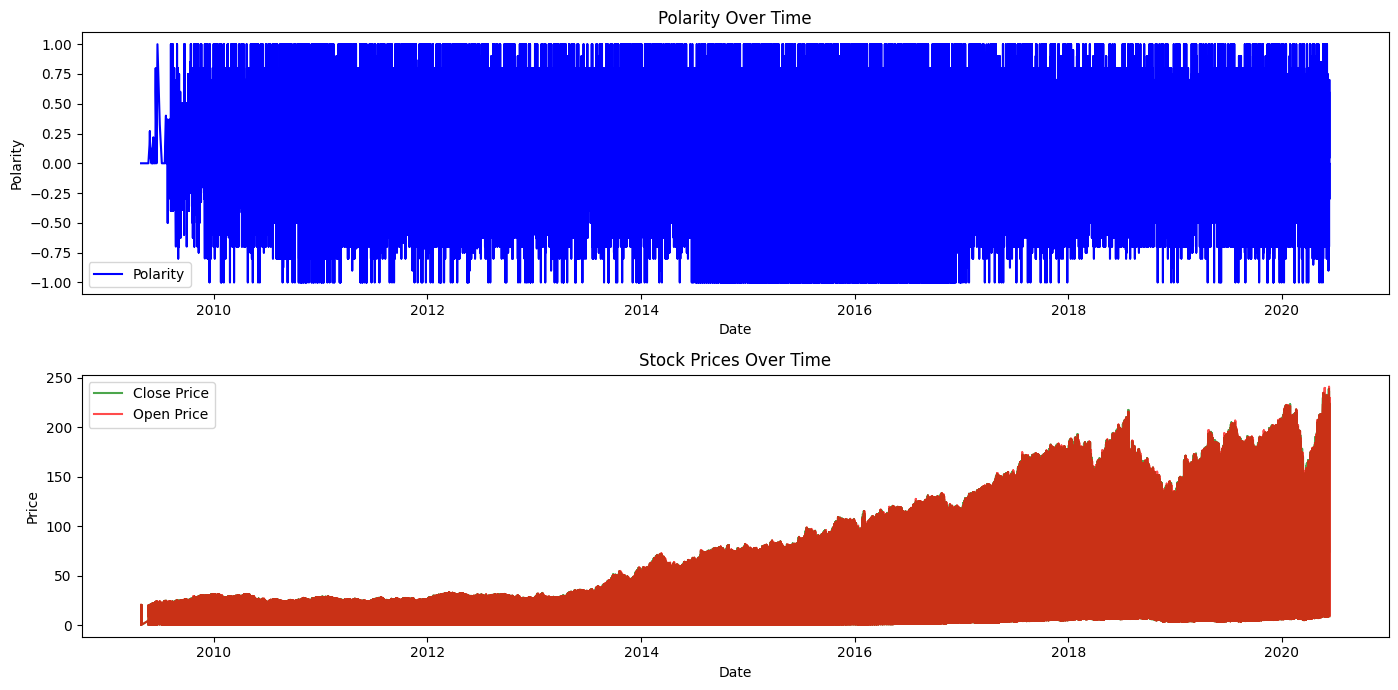

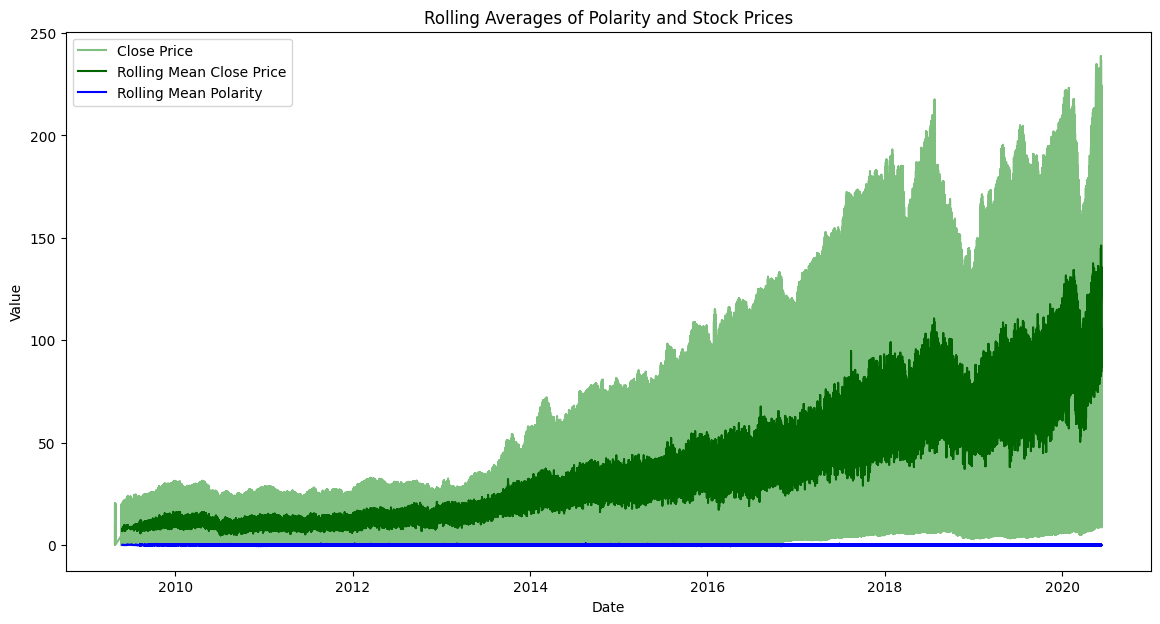

In [31]:
# Ensure 'Date' is in datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort data by Date
merged_data = merged_data.sort_values(by='Date')

# Set Date as index for easier plotting
merged_data.set_index('Date', inplace=True)

# Plot Polarity and Stock Prices
plt.figure(figsize=(14, 7))

# Plot Polarity
plt.subplot(2, 1, 1)
plt.plot(merged_data.index, merged_data['polarity'], label='Polarity', color='blue')
plt.title('Polarity Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.legend()

# Plot Stock Prices
plt.subplot(2, 1, 2)
plt.plot(merged_data.index, merged_data['Close'], label='Close Price', color='green', alpha=0.7)
plt.plot(merged_data.index, merged_data['Open'], label='Open Price', color='red', alpha=0.7)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate Rolling Averages
merged_data['Close_rolling_mean'] = merged_data['Close'].rolling(window=30).mean()
merged_data['Polarity_rolling_mean'] = merged_data['polarity'].rolling(window=30).mean()

# Plot Rolling Averages
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['Close'], label='Close Price', color='green', alpha=0.5)
plt.plot(merged_data.index, merged_data['Close_rolling_mean'], label='Rolling Mean Close Price', color='darkgreen')
plt.plot(merged_data.index, merged_data['Polarity_rolling_mean'], label='Rolling Mean Polarity', color='blue')
plt.title('Rolling Averages of Polarity and Stock Prices')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [32]:
# Get unique stock symbols
corr_analyser.correlation_each_symbol(aggregated_data)


,Ticker_symbol,correlation
0,NVDA,0.021290
1,GOOG,0.012930
2,TSLA,-0.008328
3,AAPL,0.133137
4,AMZN,0.478463


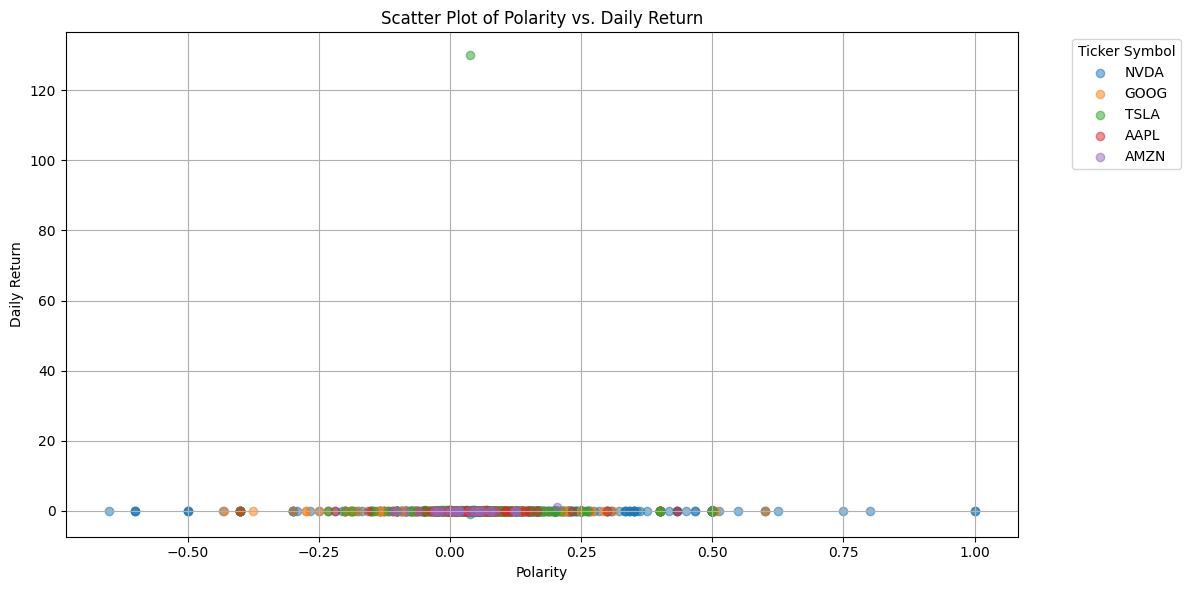

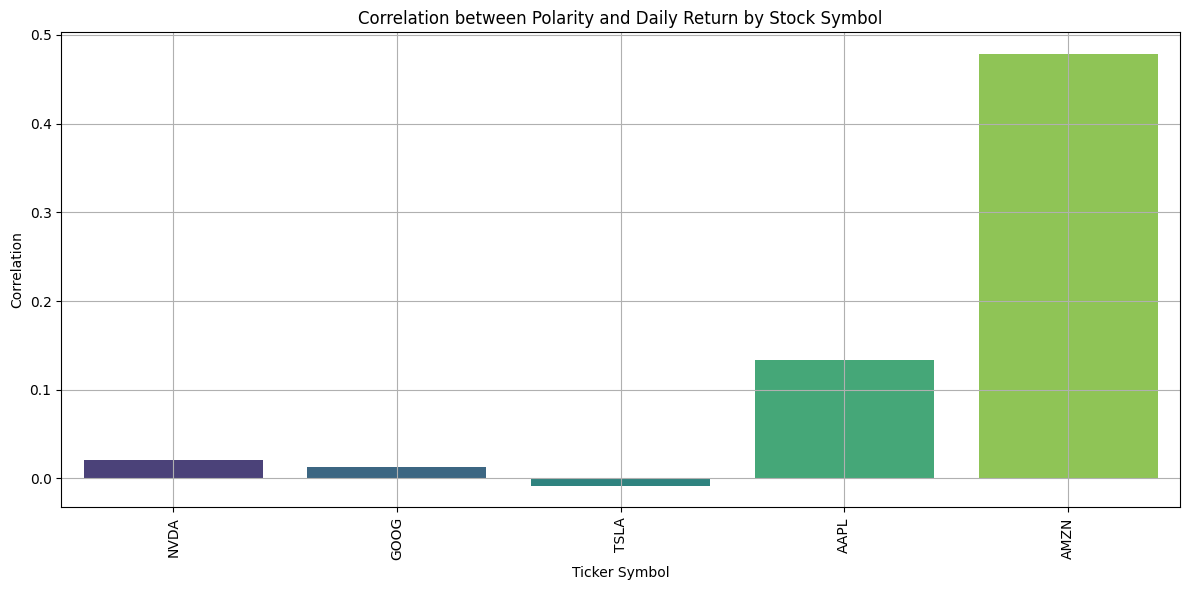

In [35]:
corr_analyser.Plot_correlation_with_symbol(aggregated_data)

<center>

## Thank You!
</center>